In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

In [3]:
mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
mouse.shape

(250, 2)

In [5]:
# Mouse g989 apparently got more than one drug
mouse[mouse['Mouse ID'].duplicated(keep=False)]

,Mouse ID,Drug
7,g989,Stelasyn
173,g989,Propriva


In [6]:
clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Mouse g989 also has duplicate timepoints in the clinical dataset
clinical[clinical[['Mouse ID','Timepoint']].duplicated(keep = False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [8]:
# Mouse g989 has an interesting time of it--duplicated from timepoint 0 to timepoint 20, then single observations
# until timepoint 35 (after which it presumably dies)
clinical[clinical['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [9]:
clinical.shape

(1893, 4)

In [10]:
clin_mouse = pd.merge(clinical, mouse, how = 'left', on = 'Mouse ID')

In [11]:
clin_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [12]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol = clin_mouse.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Preview DataFrame
tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [24]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err = clin_mouse.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

# Preview DataFrame
std_err.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [26]:
# Minor Data Munging to Re-Format the Data Frames
tumor_pivot = tumor_vol.pivot(index = 'Timepoint', columns = 'Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [30]:
# Pivot standard error as well
se_pivot = std_err.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
se_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


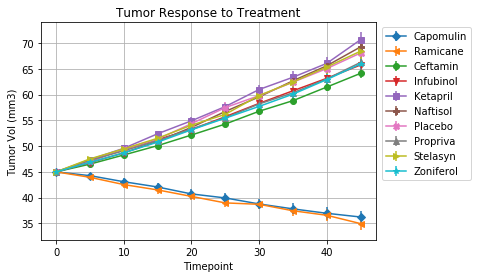

In [57]:
# Generate the Plot (with Error Bars)
plt.errorbar(x = tumor_pivot.index, y = tumor_pivot['Capomulin'], yerr = se_pivot['Capomulin'], fmt = 'D-')
plt.errorbar(x = tumor_pivot.index, y = tumor_pivot['Ramicane'], yerr = se_pivot['Ramicane'], fmt = '<-')
plt.errorbar(x = tumor_pivot.index, y = tumor_pivot['Ceftamin'], yerr = se_pivot['Ceftamin'], fmt = 'o-')
plt.errorbar(x = tumor_pivot.index, y = tumor_pivot['Infubinol'], yerr = se_pivot['Infubinol'], fmt = 'v-')
plt.errorbar(x = tumor_pivot.index, y = tumor_pivot['Ketapril'], yerr = se_pivot['Ketapril'], fmt = 's-')
plt.errorbar(x = tumor_pivot.index, y = tumor_pivot['Naftisol'], yerr = se_pivot['Naftisol'], fmt = 'P-')
plt.errorbar(x = tumor_pivot.index, y = tumor_pivot['Placebo'], yerr = se_pivot['Placebo'], fmt = 'X-')
plt.errorbar(x = tumor_pivot.index, y = tumor_pivot['Propriva'], yerr = se_pivot['Propriva'], fmt = '^-')
plt.errorbar(x = tumor_pivot.index, y = tumor_pivot['Stelasyn'], yerr = se_pivot['Stelasyn'], fmt = '>-')
plt.errorbar(x = tumor_pivot.index, y = tumor_pivot['Zoniferol'], yerr = se_pivot['Zoniferol'], fmt = '*-')
plt.title('Tumor Response to Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Vol (mm3)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.grid()
plt.show()
# Save the Figure
plt.savefig('tumor_response.png')

## Metastatic Response to Treatment

In [58]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = clin_mouse.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index()

# Preview DataFrame
met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [59]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_std_err = clin_mouse.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().reset_index()

# Preview DataFrame
met_std_err.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [60]:
# Minor Data Munging to Re-Format the Data Frames
met_pivot = met_site.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
# Preview that Reformatting worked
met_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [61]:
# Pivot standard error as well
met_se_pivot = met_std_err.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
met_se_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


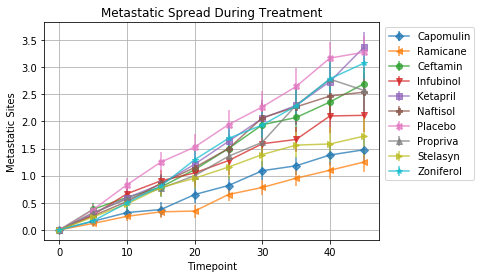

In [113]:
# Generate the Plot (with Error Bars)
plt.errorbar(x = met_pivot.index, y = met_pivot['Capomulin'], yerr = met_se_pivot['Capomulin'], fmt = 'D-')
plt.errorbar(x = met_pivot.index, y = met_pivot['Ramicane'], yerr = met_se_pivot['Ramicane'], fmt = '<-')
plt.errorbar(x = met_pivot.index, y = met_pivot['Ceftamin'], yerr = met_se_pivot['Ceftamin'], fmt = 'o-')
plt.errorbar(x = met_pivot.index, y = met_pivot['Infubinol'], yerr = met_se_pivot['Infubinol'], fmt = 'v-')
plt.errorbar(x = met_pivot.index, y = met_pivot['Ketapril'], yerr = met_se_pivot['Ketapril'], fmt = 's-')
plt.errorbar(x = met_pivot.index, y = met_pivot['Naftisol'], yerr = met_se_pivot['Naftisol'], fmt = 'P-')
plt.errorbar(x = met_pivot.index, y = met_pivot['Placebo'], yerr = met_se_pivot['Placebo'], fmt = 'X-')
plt.errorbar(x = met_pivot.index, y = met_pivot['Propriva'], yerr = met_se_pivot['Propriva'], fmt = '^-')
plt.errorbar(x = met_pivot.index, y = met_pivot['Stelasyn'], yerr = met_se_pivot['Stelasyn'], fmt = '>-')
plt.errorbar(x = met_pivot.index, y = met_pivot['Zoniferol'], yerr = met_se_pivot['Zoniferol'], fmt = '*-')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Metastatic Sites')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.grid()
# Save the Figure
plt.savefig('metastatic_spread.png')
# Show the Figure
plt.show()

## Survival Rates

In [74]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = clin_mouse.groupby(['Drug','Timepoint'])['Mouse ID'].count().reset_index()\
.rename(columns = {'Mouse ID':'Mouse Count'})

# Preview DataFrame
survival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [75]:
# Pivot survival data
survival_pivot = survival.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')

In [76]:
# Turn pivoted data into percentages
survival_pivot2 = survival_pivot/survival_pivot.loc[0] * 100
# Preview the Data Frame
survival_pivot2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


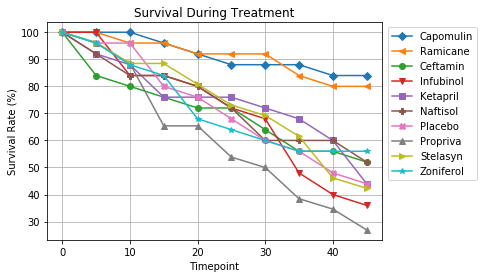

In [77]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(x = survival_pivot2.index, y = survival_pivot2['Capomulin'], fmt = 'D-')
plt.errorbar(x = survival_pivot2.index, y = survival_pivot2['Ramicane'], fmt = '<-')
plt.errorbar(x = survival_pivot2.index, y = survival_pivot2['Ceftamin'], fmt = 'o-')
plt.errorbar(x = survival_pivot2.index, y = survival_pivot2['Infubinol'], fmt = 'v-')
plt.errorbar(x = survival_pivot2.index, y = survival_pivot2['Ketapril'], fmt = 's-')
plt.errorbar(x = survival_pivot2.index, y = survival_pivot2['Naftisol'], fmt = 'P-')
plt.errorbar(x = survival_pivot2.index, y = survival_pivot2['Placebo'], fmt = 'X-')
plt.errorbar(x = survival_pivot2.index, y = survival_pivot2['Propriva'], fmt = '^-')
plt.errorbar(x = survival_pivot2.index, y = survival_pivot2['Stelasyn'], fmt = '>-')
plt.errorbar(x = survival_pivot2.index, y = survival_pivot2['Zoniferol'], fmt = '*-')
plt.title('Survival During Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Survival Rate (%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.grid()
# Save the Figure
plt.savefig('survival.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [84]:
# Calculate the percent changes for each drug
perc_change = (tumor_pivot.loc[45] - tumor_pivot.loc[0])/tumor_pivot.loc[0] * 100
# Display the data to confirm
display(perc_change)
# Create Boolean Series to control color
colors = perc_change > 0

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

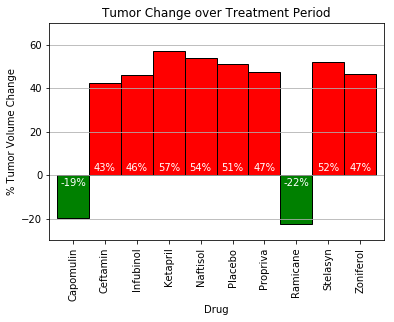

In [111]:
# Plot the percent change as bar plot, with positive values as red and negative values as green
ax = perc_change.plot(kind = 'bar', color = colors.map({True:'r',False:'g'}), width = 1, edgecolor = 'k')
# Label each bar with percentage value
for p in ax.patches:
    if p.get_height() < 0:
        ax.annotate(f'{int(round(p.get_height()))}%', xy=(p.get_x()+p.get_width()/2, -5), ha = 'center', color = 'w')
    else:
        ax.annotate(f'{int(round(p.get_height()))}%', xy=(p.get_x()+p.get_width()/2, 2), ha = 'center', color = 'w')
plt.title('Tumor Change over Treatment Period')
plt.ylabel('% Tumor Volume Change')
plt.grid(axis='y')
plt.ylim((-30,70))

plt.savefig('percent_tumor_change.png')

plt.show()

In [118]:
# Looking specifically at the mouse that got double-dosed
# Merging the datasets without deduplicating caused data integrity problems--
# Multiple datapoints for each timepoint
clin_mouse[clin_mouse['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
107,g989,0,45.000000,0,Stelasyn
108,g989,0,45.000000,0,Propriva
138,g989,0,45.000000,0,Stelasyn
139,g989,0,45.000000,0,Propriva
331,g989,5,48.786801,0,Stelasyn
332,g989,5,48.786801,0,Propriva
363,g989,5,47.570392,0,Stelasyn
364,g989,5,47.570392,0,Propriva
624,g989,10,51.745156,0,Stelasyn
625,g989,10,51.745156,0,Propriva


## Conclusions

The two clear standouts in the data are the Capomulin and Ramicane treatments, which were the only ones to result in mean reduction in tumor volume and negative percent tumor volume change, and were associated with lower metastasis and higher survivability. Some of the other treatments at least did better than the placebo on some measures, but some did worse: for instance, Propriva was associated with a significantly lower survival rate than the placebo. All treatments except Ketapril were associated with slower metastasis than the placebo, however.